In [1]:
import pandas as pd
import numpy as np

In [4]:
VIDEO_LABELS_FILE_NAME = 'data/VID_20180325_143338.mp4.csv'

In [46]:
X = np.load('data/gray_compressed_data_VID_20180325_143338.mp4.npy')
X = X.reshape([*X.shape,1])
y = pd.read_csv(VIDEO_LABELS_FILE_NAME, sep=',').values[:,1]

X.shape, y.shape

((1335, 96, 144, 1), (1335,))

In [49]:
 y.max(), y.min()

(0.83750000000000002, 0.074999999999999997)

In [50]:
x_height, x_width = X.shape[1:3]

In [51]:
from  keras.models  import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers
from keras import regularizers

In [52]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(x_height, x_width, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'
#                 ,activity_regularizer=regularizers.l1(0.03)
               ))
model.add(Dropout(0.5))
model.add(Dense(1))

In [64]:
model.compile(loss='mean_squared_error', metrics=['mae'], optimizer='RMSprop')

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [67]:
model.fit(x_train, y_train,
        batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 1068 samples, validate on 267 samples
Epoch 1/10
1068/1068 [==============================] - 56s 52ms/step - loss: 0.9012 - mean_absolute_error: 0.4616 - val_loss: 0.0593 - val_mean_absolute_error: 0.2295
Epoch 2/10
1068/1068 [==============================] - 60s 57ms/step - loss: 0.1435 - mean_absolute_error: 0.3097 - val_loss: 0.0505 - val_mean_absolute_error: 0.2107
Epoch 3/10
1068/1068 [==============================] - 54s 51ms/step - loss: 0.1520 - mean_absolute_error: 0.3246 - val_loss: 0.2059 - val_mean_absolute_error: 0.4293
Epoch 4/10
1068/1068 [==============================] - 57s 53ms/step - loss: 0.1424 - mean_absolute_error: 0.3129 - val_loss: 0.0901 - val_mean_absolute_error: 0.2826
Epoch 5/10
1068/1068 [==============================] - 58s 54ms/step - loss: 0.1324 - mean_absolute_error: 0.2958 - val_loss: 0.0255 - val_mean_absolute_error: 0.1437
Epoch 6/10
1068/1068 [==============================] - 59s 55ms/step - loss: 0.1272 - mean_absolute_error: 0.298

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

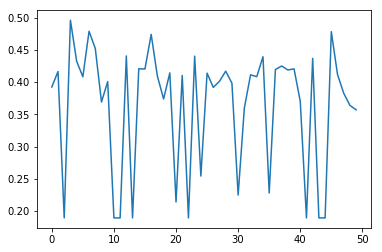

In [76]:
plt.plot(model.predict(x_train[:50]).ravel())
plt.show()

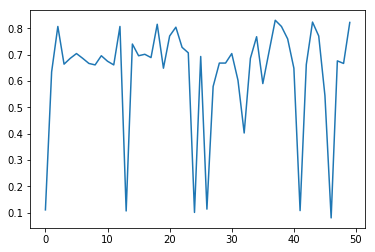

In [77]:
plt.plot(y_test[:50].ravel())
plt.show()